In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# survival = Survival(0=NO;1=Yes)
# class = passenger class(1=1st,2=2nd,3=3rd)
# name = Name
# sex = sex
# age = age
# sibsp = siblings/spouses aboard
# parch = number of parents/children aboard 
# ticket = ticket number 
# fare = passenger fare
# cabin = cabin 
# embarked = port of embarkation (c=Cherbourg; Q=Queenstown; S=Southampton)

In [3]:
#load a CSV file
df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<function matplotlib.pyplot.show(close=None, block=None)>

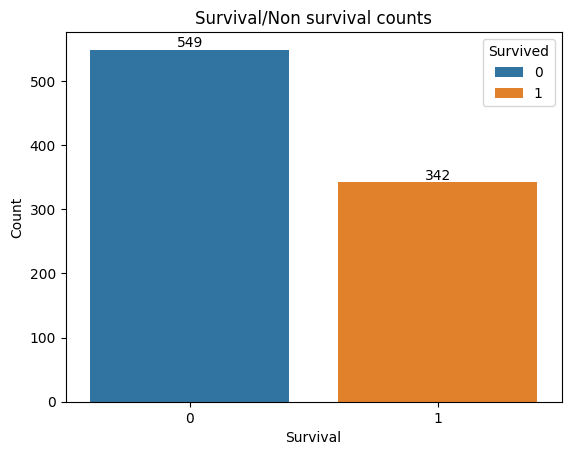

In [4]:
graph = sns.countplot(x='Survived',data=df,hue='Survived')
plt.title("Survival/Non survival counts")
plt.xlabel("Survival")
plt.ylabel("Count")

for container in graph.containers:
    graph.bar_label(container)

plt.show

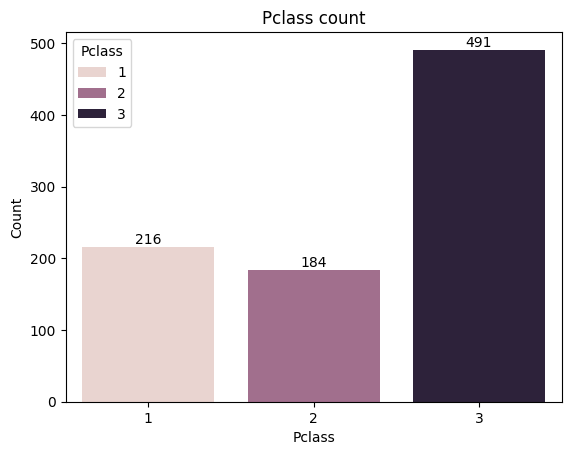

In [5]:
graph = sns.countplot(x='Pclass',data=df,hue='Pclass')
plt.title("Pclass count")
plt.xlabel("Pclass")
plt.ylabel("Count")

for container in graph.containers:
    graph.bar_label(container)

plt.show()

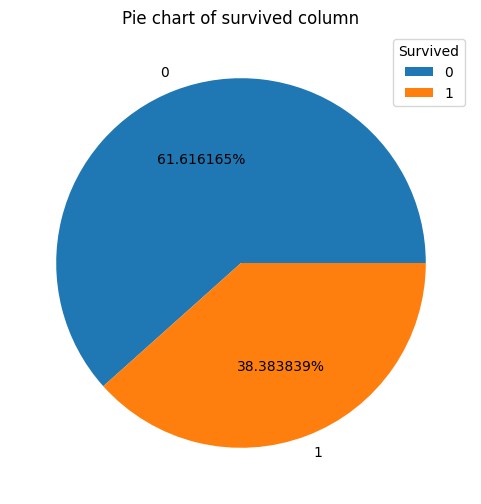

In [17]:
category_counts=df['Survived'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(category_counts,labels=category_counts.index,autopct='%2f%%')
plt.title('Pie chart of survived column')
plt.legend(labels=category_counts.index,title='Survived',loc='upper right')
plt.show()

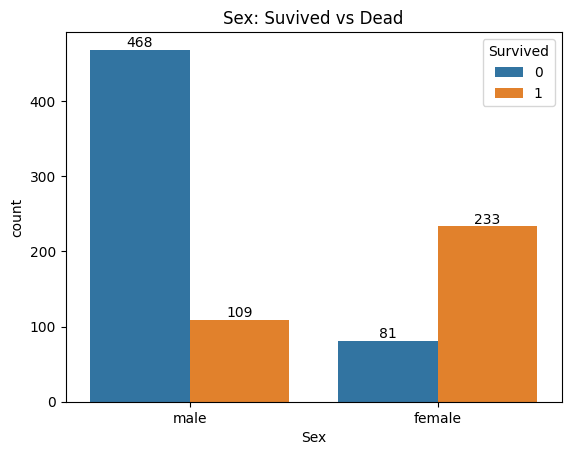

In [7]:
graph = sns.countplot(x='Sex',hue = 'Survived', data=df)
plt.title('Sex: Suvived vs Dead')

for container in graph.containers:
    graph.bar_label(container)

plt.show()

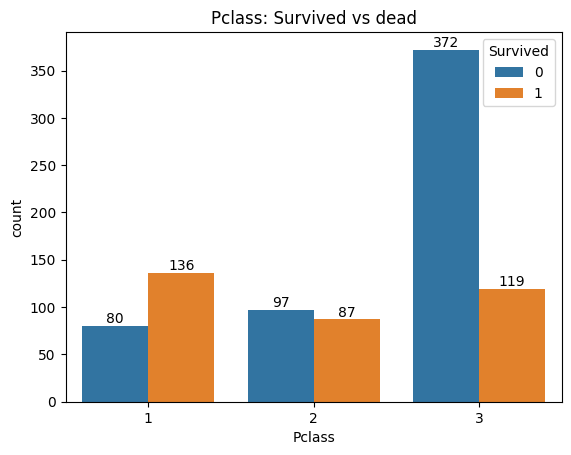

In [8]:
graph=sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title('Pclass: Survived vs dead')

for container in graph.containers:
    graph.bar_label(container)

plt.show()

In [9]:
df.groupby(['Pclass','Sex','Survived'])['Survived'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


Oldest passenger was of:  80.0 Years
Youngest passenger was of:  0.42 Years
Average passenger was of:  29.69911764705882 Years


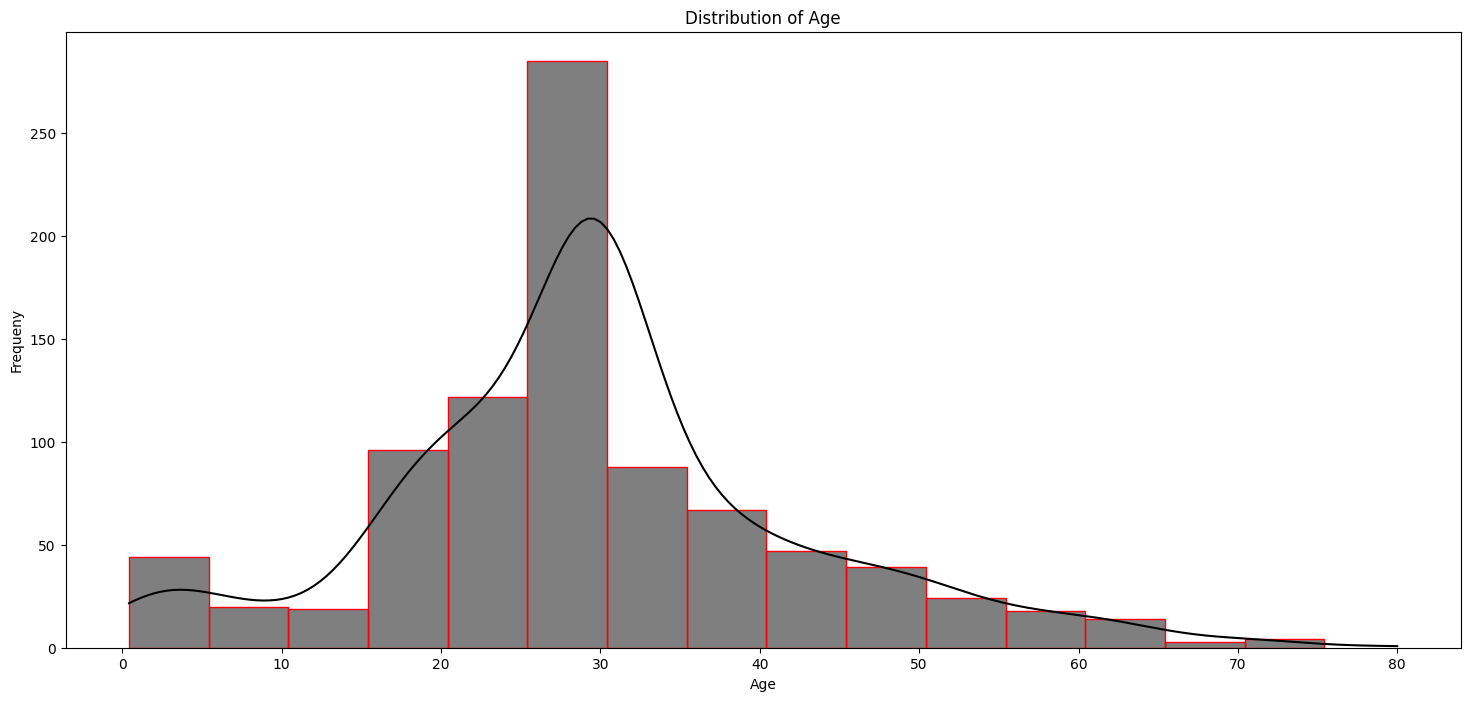

In [12]:
print('Oldest passenger was of: ',df['Age'].max(),'Years')
print('Youngest passenger was of: ',df['Age'].min(),'Years')
print('Average passenger was of: ',df['Age'].mean(),'Years')

plt.figure(figsize=(18,8))

sns.histplot(df['Age'],bins=np.arange(df['Age'].min(),df['Age'].max(),5),color='black',edgecolor='red',kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequeny')
plt.show()

In [13]:
#creating heatmap

df['Sex']=df['Sex'].map({"male":int(0),"female":int(1)})
df=df[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare"]]

corr=df.corr()

<Axes: >

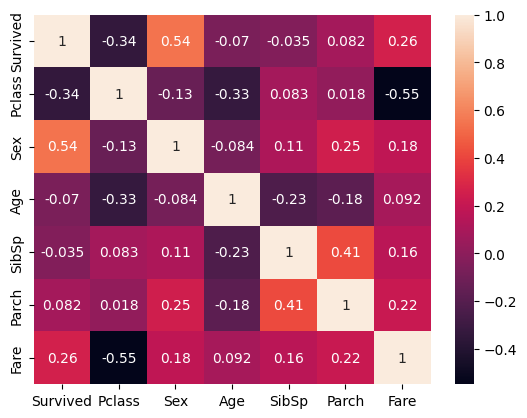

In [14]:
sns.heatmap(corr,annot=True)

In [15]:
df.shape

(891, 7)

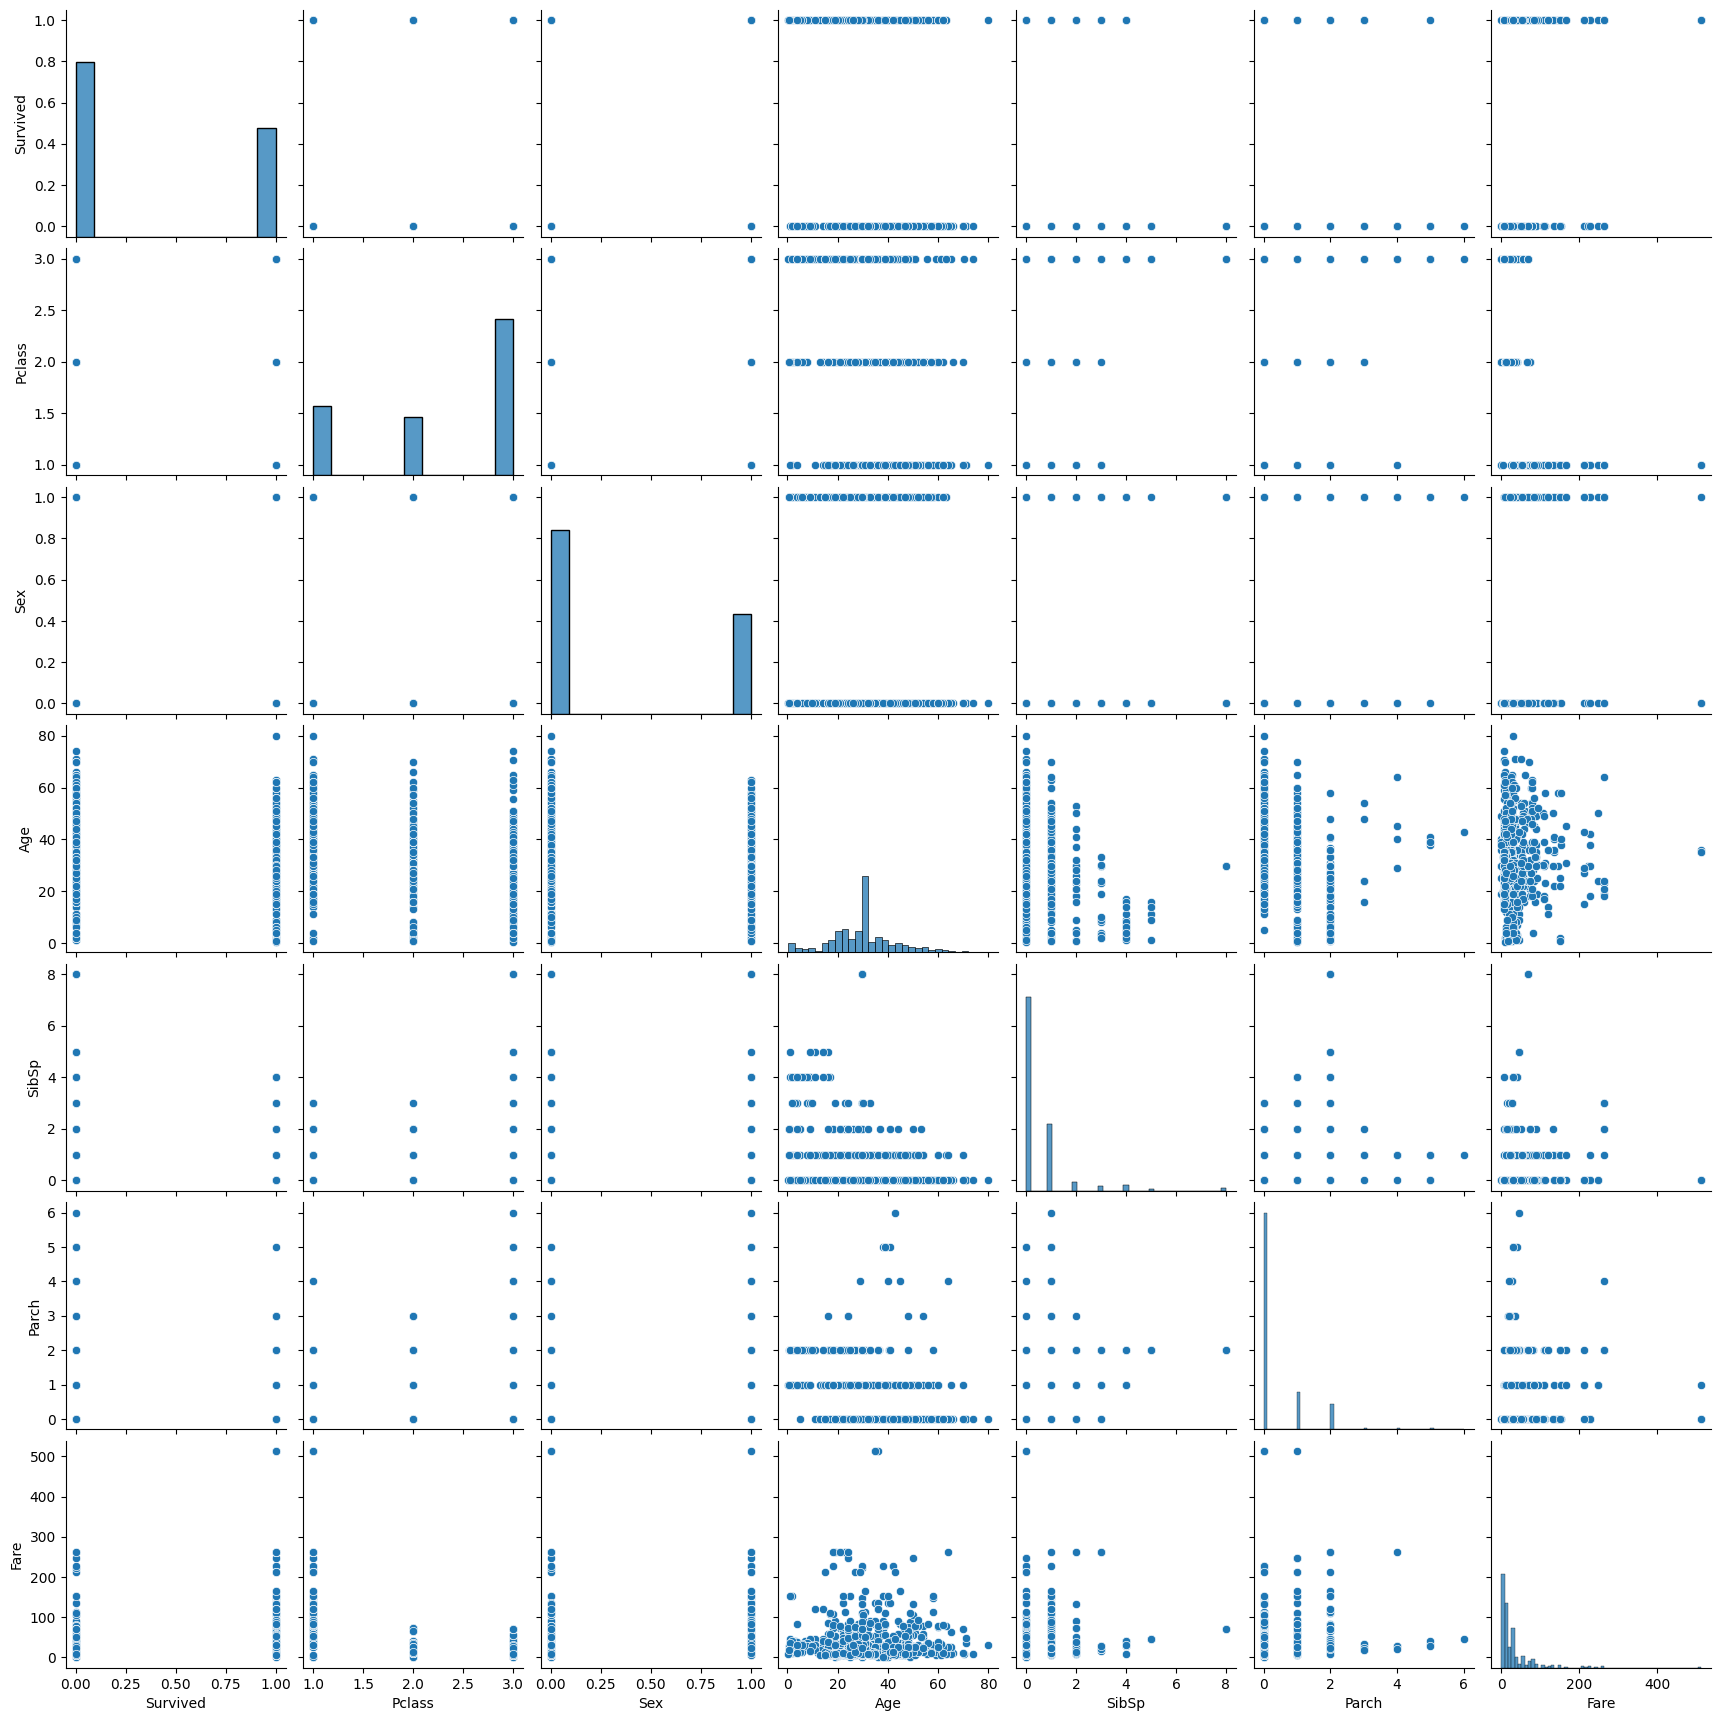

In [16]:
sns.pairplot(df)